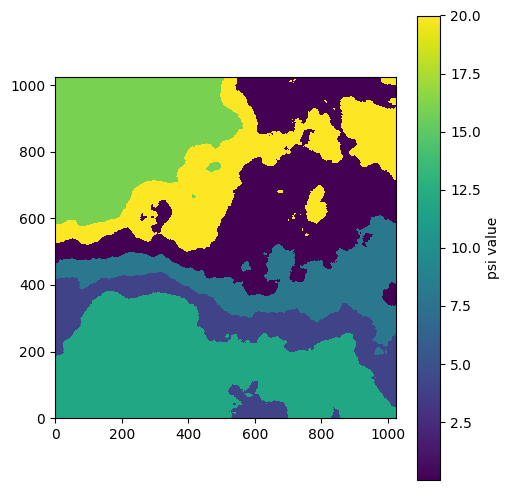

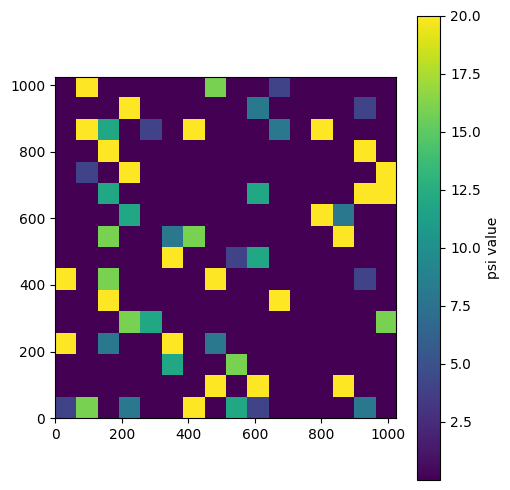

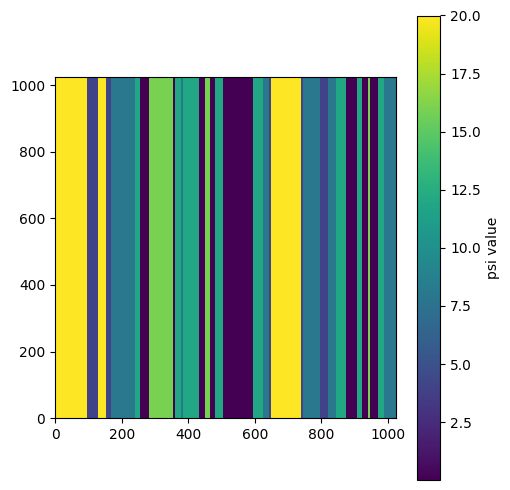

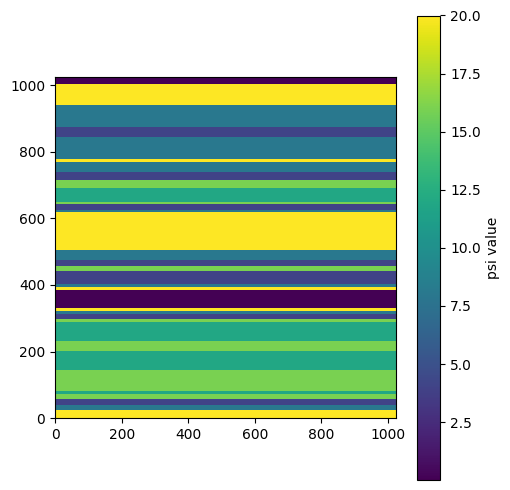

In [ ]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from neuralop.data.datasets.darcy_data_generation import GRF_DCT, psi_quantile

import numpy as np
import matplotlib.pyplot as plt
from math import ceil

epsilon = 1e-4
setting = {
    's': 1024,
    'd': 2,
    'tau': 3,
    'alpha': 2,
}
rng = np.random.default_rng()

# [1]

coeff = psi_quantile(*GRF_DCT(**setting, rng=rng, return_with_sigma=True), rng=rng)

plt.figure(figsize=(5.2, 5))
plt.imshow(coeff, origin='lower', interpolation='nearest', aspect='equal')
cbar = plt.colorbar()
cbar.set_label('psi value')
plt.tight_layout()
plt.show()

# [2]

coarse_n = 16
s = setting['s']
assert s%coarse_n == 0
coeff = np.full((s, s), fill_value=epsilon, dtype=float)

b = s // coarse_n
total_cells = coarse_n * coarse_n

levels  = np.array([20.0, 16.0, 12.0, 8.0, 4.0], dtype=float)
n_patches = np.array([ceil(total_cells*(3/32)), ceil(total_cells*(1/32)), ceil(total_cells*(1/32)), ceil(total_cells*(1/32)), ceil(total_cells*(1/32))], dtype=int)
assert n_patches.sum() <= total_cells

chosen = rng.choice(total_cells, size=n_patches.sum(), replace=False)

start = 0
for val, cnt in zip(levels, n_patches):
    ids = chosen[start:start+cnt]
    start += cnt
    ii = ids // coarse_n
    jj = ids % coarse_n

    for i, j in zip(ii, jj):
        r0, r1 = i*b, (i+1)*b
        c0, c1 = j*b, (j+1)*b
        coeff[r0:r1, c0:c1] = val

plt.figure(figsize=(5.2, 5))
plt.imshow(coeff, origin='lower', interpolation='nearest', aspect='equal')
cbar = plt.colorbar()
cbar.set_label('psi value')
plt.tight_layout()
plt.show()

# [3]

band_width = 8
s = setting['s']
assert s%band_width == 0

new_setting = {**setting, 's':s//band_width, 'd':1, 'tau':10*setting['tau']}
line = psi_quantile(*GRF_DCT(**new_setting, rng=rng, return_with_sigma=True), rng=rng)
row = np.repeat(line, band_width)

if len(row) > s:
    row = row[:s]
elif len(row) < s:
    row = np.pad(row, (0, s - len(row)), mode='edge')

coeff = np.tile(row, (s, 1))

plt.figure(figsize=(5.2, 5))
plt.imshow(coeff, origin='lower', interpolation='nearest', aspect='equal')
cbar = plt.colorbar()
cbar.set_label('psi value')
plt.tight_layout()
plt.show()

# [4]

band_width = 8
s = setting['s']
assert s%band_width == 0

band_width = 8
s = setting['s']
assert s%band_width == 0

new_setting = {**setting, 's':s//band_width, 'd':1, 'tau':10*setting['tau']}
line = psi_quantile(*GRF_DCT(**new_setting, rng=rng, return_with_sigma=True), rng=rng)
row = np.repeat(line, band_width)

if len(row) > s:
    row = row[:s]
elif len(row) < s:
    row = np.pad(row, (0, s - len(row)), mode='edge')

coeff = np.tile(row, (s, 1)).T

plt.figure(figsize=(5.2, 5))
plt.imshow(coeff, origin='lower', interpolation='nearest', aspect='equal')
cbar = plt.colorbar()
cbar.set_label('psi value')
plt.tight_layout()
plt.show()
